In [1]:
#Reading the data set
import pandas as pd
train=pd.read_csv('Tweets-train.csv')

#Selecting only sentiment and tweet column from the entire data set
train=train[['airline_sentiment','text']]

In [2]:
train.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,neutral,@VirginAmerica I didn't today... Must mean I n...
2,negative,@VirginAmerica it's really aggressive to blast...
3,negative,@VirginAmerica and it's a really big bad thing...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [3]:
#See some positive sentiments
for each in train[train['airline_sentiment']=="positive"].sample(10,random_state=10)['text']:
    print(each) 
    print 

@USAirways it was customer service like I have never seen before!  Kudos to your organization.
@AmericanAir I love your company and your staff is amazing. They just made an uncomfortable situation comfortable
@united I appreciate the follow up.
@JetBlue boarding the back of the airplane first. Like a boss. #sosmart #jetblue #frequentflyerappreciates #alsoyayforsnacks
@AmericanAir mission accomplished today, Thank you!
@united thnx
@united thank you for following up!
@JetBlue thanks so much!! ❤️✨ very relaxing flight!
@USAirways thanks for seating me next to 2 hot athletes. This flight is significantly better now!
@united awesome new plane flight 1701


In [4]:
#See some negative sentiments
for each in train[train['airline_sentiment']=="negative"].sample(10,random_state=10)['text']:
    print(each) 
    print

@AmericanAir continues to win: I've never missed a flight before, but a nice little quiet gate change made it possible. Sheesh.
@united is that all that matters, not the fact that we're at a different destination, we were put through a tremendous amount of stress,
@USAirways your lack of customer service has shined. I need you to step up and get my lost baggage to delta. So they can return it to me.
@united Terribly disappointed. Confirmed reservation delayed and your cust. service staff was not helpful in finding an alternate solution.
@united what is this subtlety gate changes? Are you kidding with me?
@SouthwestAir and now no wifi??? Come on.
@JetBlue is flight 51 on 4/24/15 moved back? When I booked it said we arrive 11:31 but now it says 12:08 😢
@AmericanAir complt incompetence on flt 295.Lav delay from a pln that lnded last nite, no internet and poor svc. Not what I expect from u.
@united @annricord 0162431184663.
3 of your agents said we would be refunded. Agents said United sho

In [5]:
#See some neutral sentiments
for each in train[train['airline_sentiment']=="neutral"].sample(10,random_state=10)['text']:
    print(each) 
    print

@JetBlue you guys get rid of the hip hop stations on Sirius XM?
@JetBlue deal!
@united can I request a ticket change through twitter ?
@united My mom left her Kindle on flight 1544 today. Burgundy case with a light. Seat 27D. Did anyone find it?
@USAirways am 2. 1/2 hours from airport sure would like to talk to someone
@JetBlue well I'm not sure I'm that bold! lol or are you saying you didn't believe me?? :P
@united can you send me another confirmation email?
@SouthwestAir first time flyer, scheduled a (round)trip. set on departure date not sure on returning date, policy/fees on changing Re Flight
@SouthwestAir still haven't been able to get through, thanks for responding
@USAirways we even offered to fly in to another airport and they said they couldn't do that. No explanation why they can't.


In [6]:
#Clean the data and remove things like @,#,https:/,etc. as they are not going to help in classifer model.

In [7]:
#@ mentions
import re

print(train.text[5])
print() 
print(re.sub(r'@+','',train.text[5]))

@virginamerica Well, I didn't…but NOW I DO! :-D

virginamerica Well, I didn't…but NOW I DO! :-D


In [8]:
#Links 

print(train.text[10])
print() 
print(re.sub('http?://[A-Za-z0-9./]+','',train.text[10]))


@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn

@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel 


In [9]:
#Select only alphabets & numbers so that punctuations and emoticons are removed.

print(train.text[22])
print() 
print(re.sub("[^a-zA-Z0-9]", " ",train.text[22]))
print() 
print() 
print(train.text[5977])
print() 
print(re.sub("[^a-zA-Z0-9]", " ",train.text[5977]))

@VirginAmerica amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS

 VirginAmerica amazing to me that we can t get any cold air from the vents   VX358  noair  worstflightever  roasted  SFOtoBOS


@JetBlue thanks so much!! ❤️✨ very relaxing flight!

 JetBlue thanks so much       very relaxing flight 


In [10]:
#Preparing a function for cleaning all the above observed tokens from the tweet text
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
import re
def tweet_cleaner1(text):
    text=re.sub(r'@+','',text)
    text=re.sub('http?://[A-Za-z0-9./]+','',text)
    text=re.sub("[^a-zA-Z]", " ",text)
    lower_case = text.lower()
    words = tokenizer.tokenize(lower_case)
    return (" ".join(words)).strip()

In [11]:
train['Cleaned-Text']=train['text'].apply(tweet_cleaner1)

In [12]:
train.head(4)

,airline_sentiment,text,Cleaned-Text
0,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus you ve added commercials to...
1,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica i didn t today must mean i need ...
2,negative,@VirginAmerica it's really aggressive to blast...,virginamerica it s really aggressive to blast ...
3,negative,@VirginAmerica and it's a really big bad thing...,virginamerica and it s a really big bad thing ...


In [13]:
#See some words in All sentiments
from nltk.probability import FreqDist
import matplotlib as plt
from collections import Counter
for group_name,subset in train.groupby('airline_sentiment'):
    sentimentData=subset['Cleaned-Text']
    words=[]
    for each in sentimentData:
        words.extend(each.split(" "))
    print(group_name)
    print(Counter(words).most_common(15))
    fdist = FreqDist(words)
    fdist.plot(30,cumulative=False)
    print() 

negative
[('to', 4326), ('i', 3313), ('the', 3021), ('a', 2344), ('flight', 2113), ('united', 2101), ('and', 2049), ('on', 2023), ('for', 1999), ('you', 1959), ('my', 1726), ('usairways', 1722), ('americanair', 1549), ('is', 1526), ('t', 1327)]


<Figure size 640x480 with 1 Axes>


neutral
[('to', 1185), ('i', 1004), ('the', 730), ('a', 616), ('you', 561), ('jetblue', 540), ('united', 530), ('southwestair', 489), ('on', 479), ('for', 443), ('flight', 436), ('my', 391), ('is', 372), ('americanair', 363), ('in', 355)]


<Figure size 640x480 with 1 Axes>


positive
[('the', 690), ('to', 675), ('you', 672), ('i', 555), ('for', 493), ('thanks', 448), ('jetblue', 443), ('southwestair', 424), ('a', 385), ('united', 376), ('thank', 336), ('and', 306), ('flight', 269), ('my', 263), ('americanair', 254)]


<Figure size 640x480 with 1 Axes>

In [14]:
#Remove Stopwords from all the tweets.Save changes in a new column and list down most common 15 words.
punctuation=re.compile(r'[-.?!,:;()|0-9]')
post_punctuation=[]
def Removepunc(gold_word_tokenize):
    for words in gold_word_tokenize:
        word=punctuation.sub("",words)
        if len(word)>0:
            post_punctuation.append(word)
    return post_punctuation

In [15]:
train['Cleaned-Text'].head()

0    virginamerica plus you ve added commercials to...
1    virginamerica i didn t today must mean i need ...
2    virginamerica it s really aggressive to blast ...
3    virginamerica and it s a really big bad thing ...
4    virginamerica yes nearly every time i fly vx t...
Name: Cleaned-Text, dtype: object

In [16]:
def RemoveStopWords(post_punctuation):
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    stp_words=stopwords.words('english')
    post_stop_words=[]
    word_tokenize = word_tokenize(post_punctuation)
    for words in word_tokenize:
        words=words.lower()
        if words not in stp_words:
            post_stop_words.append(words)           
    return (" ".join(post_stop_words)).strip()

In [17]:
train['Clean-Text-StopWords-Removed']=train['Cleaned-Text'].apply(RemoveStopWords)

negative
[('flight', 2113), ('united', 2101), ('usairways', 1722), ('americanair', 1549), ('southwestair', 884), ('jetblue', 755), ('get', 728), ('cancelled', 648), ('service', 530), ('hours', 502), ('help', 443), ('customer', 428), ('time', 426), ('hold', 424), ('plane', 387)]


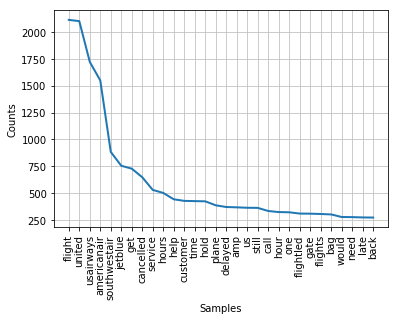



neutral
[('jetblue', 540), ('united', 530), ('southwestair', 489), ('flight', 436), ('americanair', 363), ('usairways', 302), ('get', 173), ('please', 132), ('virginamerica', 130), ('flights', 130), ('help', 121), ('thanks', 115), ('need', 114), ('would', 92), ('dm', 91)]


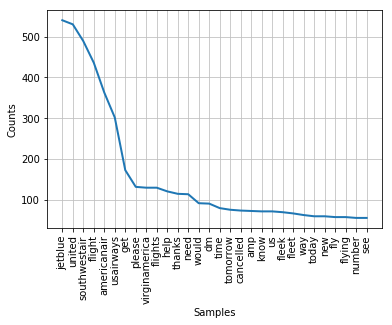



positive
[('thanks', 448), ('jetblue', 443), ('southwestair', 424), ('united', 376), ('thank', 336), ('flight', 269), ('americanair', 254), ('usairways', 199), ('great', 165), ('service', 120), ('virginamerica', 114), ('love', 105), ('best', 85), ('customer', 85), ('good', 82)]


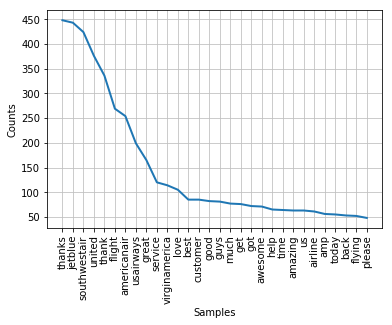

In [18]:
#Again let's see the counts of most common words after removing stopwords.

from collections import Counter
for group_name,subset in train.groupby('airline_sentiment'):
    sentimentData=subset['Clean-Text-StopWords-Removed']
    words=[]
    for each in sentimentData:
        words.extend(each.split(" "))
    print(group_name)
    print(Counter(words).most_common(15))
    fdist = FreqDist(words)
    fdist.plot(30,cumulative=False)
    print() 
    print()
    

In [19]:
# Remove the unnecessary words like americanair, united, delta, etc. from all the tweets.
def RemoveExplicitlyMentionedWords(string,listofWordsToRemove):
    listOfAllWords=string.split(" ")
    listOfWords= [x for x in listOfAllWords if x not in listofWordsToRemove]
    return (" ".join(listOfWords)).strip()    

In [20]:
train['Cleaned-Text'].apply(RemoveStopWords)

0        virginamerica plus added commercials experienc...
1        virginamerica today must mean need take anothe...
2        virginamerica really aggressive blast obnoxiou...
3                       virginamerica really big bad thing
4        virginamerica yes nearly every time fly vx ear...
5                                       virginamerica well
6            virginamerica amazing arrived hour early good
7        virginamerica know suicide second leading caus...
8        virginamerica lt pretty graphics much better m...
9        virginamerica great deal already thinking nd t...
10       virginamerica virginmedia flying fabulous sedu...
11                virginamerica sfo pdx schedule still mia
12       virginamerica excited first cross country flig...
13                                    flying virginamerica
14       virginamerica know would amazingly awesome bos...
15       virginamerica first fares may three times carr...
16                              virginamerica love graph

In [21]:
list_of_words_to_remove=['americanair','united','delta','southwestair','jetblue','virginamerica','usairways','flight','plane']
train['Final-Wrangled-Text']=train['Clean-Text-StopWords-Removed'].apply(RemoveExplicitlyMentionedWords,listofWordsToRemove=list_of_words_to_remove)

negative
[('get', 728), ('cancelled', 648), ('service', 530), ('hours', 502), ('help', 443), ('customer', 428), ('time', 426), ('hold', 424), ('delayed', 371), ('amp', 368), ('us', 364), ('still', 363), ('call', 334), ('hour', 324), ('one', 322)]


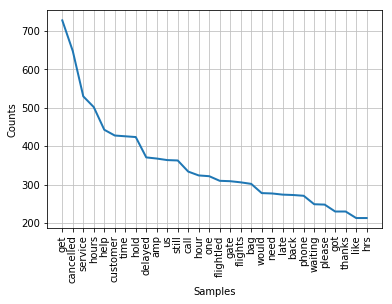


neutral
[('get', 173), ('please', 132), ('flights', 130), ('help', 121), ('thanks', 115), ('need', 114), ('would', 92), ('dm', 91), ('time', 80), ('tomorrow', 76), ('cancelled', 74), ('amp', 73), ('know', 72), ('us', 72), ('fleek', 70)]


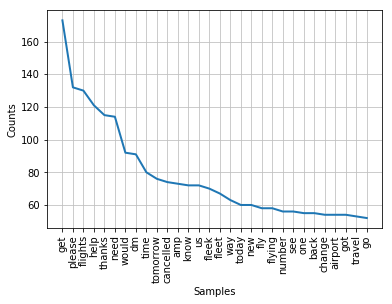


positive
[('thanks', 448), ('thank', 336), ('great', 165), ('service', 120), ('love', 105), ('best', 85), ('customer', 85), ('good', 82), ('guys', 81), ('much', 77), ('get', 76), ('got', 72), ('awesome', 71), ('help', 65), ('time', 64)]


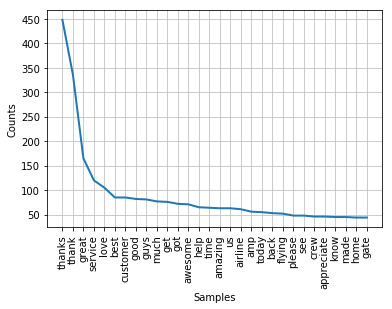

In [22]:
#Count Again words in All sentiments
from collections import Counter
for group_name,subset in train.groupby('airline_sentiment'):
    sentimentData=subset['Final-Wrangled-Text']
    words=[]
    for each in sentimentData:
        words.extend(each.split(" "))
    print(group_name)
    print(Counter(words).most_common(15))
    fdist = FreqDist(words)
    fdist.plot(30,cumulative=False)
    print() 
   

In [23]:
# Encode Sentiments using Label Encoder
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
train['SentimentLabel']=l.fit_transform(train['airline_sentiment'])
train.head(4)

,airline_sentiment,text,Cleaned-Text,Clean-Text-StopWords-Removed,Final-Wrangled-Text,SentimentLabel
0,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus you ve added commercials to...,virginamerica plus added commercials experienc...,plus added commercials experience tacky,2
1,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica i didn t today must mean i need ...,virginamerica today must mean need take anothe...,today must mean need take another trip,1
2,negative,@VirginAmerica it's really aggressive to blast...,virginamerica it s really aggressive to blast ...,virginamerica really aggressive blast obnoxiou...,really aggressive blast obnoxious entertainmen...,0
3,negative,@VirginAmerica and it's a really big bad thing...,virginamerica and it s a really big bad thing ...,virginamerica really big bad thing,really big bad thing,0


In [25]:
# Here we observe,
# 0->neutral
# 1->positive
# 2->negative

In [28]:
# Vectorize the Text Column 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [29]:
x_train=vectorizer.fit_transform(train['Final-Wrangled-Text'])

In [30]:
x_train[:1]

<1x10127 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [31]:
# Preparing a multiclass Classification model using any classification algorithm and create a model 

In [32]:
y_train=train['SentimentLabel']

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Reading the test data and carry our data cleaning, encoding and vectorising operations on the test data

In [34]:
test=pd.read_csv('Tweets-test.csv')
test=test[['airline_sentiment','text']]
test['Cleaned-Text']=test['text'].apply(tweet_cleaner1)
test['Clean-Text-StopWords-Removed']=test['Cleaned-Text'].apply(RemoveStopWords)
test['Final-Wrangled-Text']=test['Clean-Text-StopWords-Removed'].apply(RemoveExplicitlyMentionedWords,listofWordsToRemove=list_of_words_to_remove)
x_test=vectorizer.transform(test['Final-Wrangled-Text'])

In [35]:
#Encoding label for test data as well
test['SentimentLabel']=l.transform(test['airline_sentiment'])
y_test=test['SentimentLabel']

In [ ]:
#Predict the sentiments for test data

In [36]:
y_pred=nb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
df = pd.DataFrame(columns=['y_pred'])
df['y_pred']=y_pred

In [38]:
def GetOrignalSentiment(val):
    if val==0:
        return 'negative'
    elif val==1:
        return 'neutral'
    else:
        return 'positive'
    
Result=test[['text','airline_sentiment']]
Result['Predicted_sentiment']=df['y_pred'].apply(GetOrignalSentiment)

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [39]:
Result.head(3)

,text,airline_sentiment,Predicted_sentiment
0,@AmericanAir why did you drop my call. Why don...,negative,negative
1,@USAirways thanks for the seat that doesn't re...,negative,negative
2,@AmericanAir wasn't just a delay. Your counter...,negative,negative


In [40]:
# Print and explain the Confusion Matrix 
print("Confusion Matrix:\n\n",metrics.confusion_matrix(Result['airline_sentiment'],Result['Predicted_sentiment'],labels=['negative','neutral','positive']))

Confusion Matrix:

 [[2397   78   33]
 [ 456  333   62]
 [ 225   51  365]]


In [41]:
# Explaning Confusion Matrix Elements

for i,x in Result.groupby(['airline_sentiment','Predicted_sentiment']):
    print("Actual "+ i[0]+ " Predicted "+i[1]+ ":", len(x))

Actual negative Predicted negative: 2397
Actual negative Predicted neutral: 78
Actual negative Predicted positive: 33
Actual neutral Predicted negative: 456
Actual neutral Predicted neutral: 333
Actual neutral Predicted positive: 62
Actual positive Predicted negative: 225
Actual positive Predicted neutral: 51
Actual positive Predicted positive: 365


In [42]:
# Compute Accuracy of your model 

In [43]:
#Accuracy :
ActualNegativePrdictedNegative=2396
ActualNeutralPrdictedNeutral=333
ActualPositivePrdictedPositive=365
TotalCorrect=ActualNegativePrdictedNegative+ActualNeutralPrdictedNeutral+ActualPositivePrdictedPositive
print("Accuracy=",TotalCorrect*100.0/len(test) ,"%")

Accuracy= 77.35 %


In [44]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      2508
           1       0.72      0.39      0.51       851
           2       0.79      0.57      0.66       641

   micro avg       0.77      0.77      0.77      4000
   macro avg       0.76      0.64      0.68      4000
weighted avg       0.77      0.77      0.75      4000

